# Iterative forecasting

Iterative forecasting (sometimes called recursice) involves repeatedly predicting 
with a forecaster by adding predicted values to the actual values. Suppose you have a series of length $n$ and 
you want to forecast the next 20 steps.

```
call f.fit(y)
for i ← 1 to steps_ahead do
    preds[i - 1] ← f.predict(y)
    y.append(preds[i - 1])
end for
```
You can visualise the process as follows

<img src="./img/iterative.png" width="600" alt="iterative forecasting">


We will demonstrate direct forecasting with the airline data

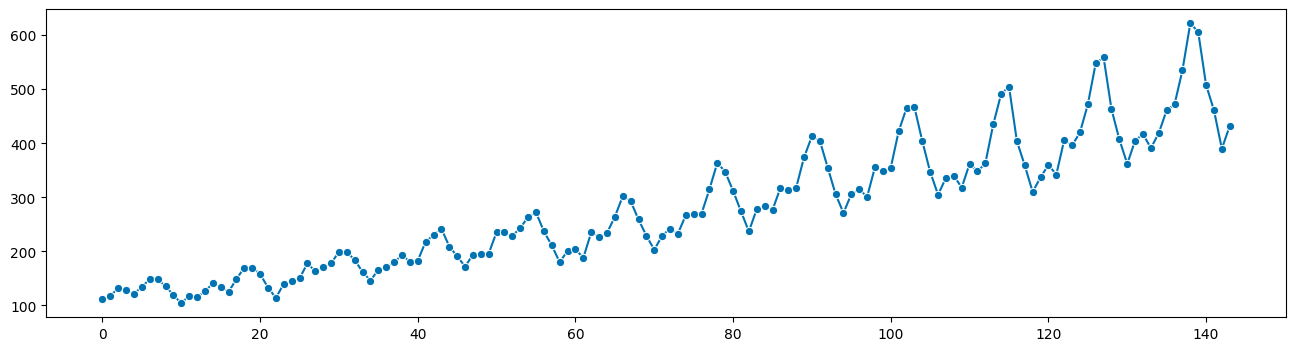

In [1]:
from aeon.datasets import load_airline
from aeon.visualisation import plot_series

airline = load_airline()
_ = plot_series(airline)

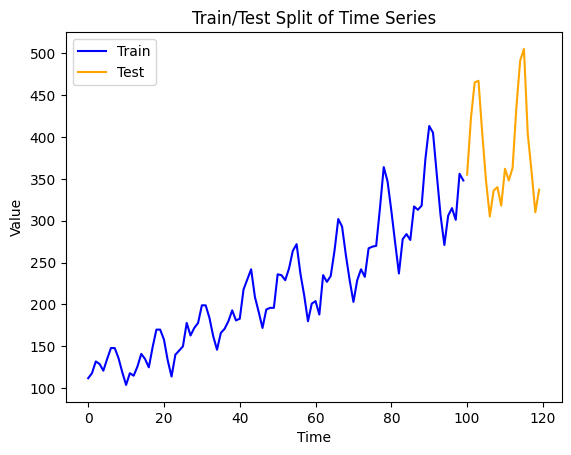

In [2]:
import matplotlib.pyplot as plt
import numpy as np

y_train = airline[:100]
y_test = airline[100:120]
plt.plot(np.arange(0, len(y_train)), y_train, label="Train", color="blue")
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    label="Test",
    color="orange",
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Train/Test Split of Time Series")
plt.show()

We want to train a forecaster on the train set and forecast predictions for the
subsequent test steps. aeon forecasters have a single prediction. The
`RegressionForecaster` is a window based forecaster that by default uses linear
regression,

In [6]:
from aeon.forecasting import RegressionForecaster

reg = RegressionForecaster(horizon=1, window=10)
reg.fit(y_train)
p1 = reg.predict(y_train)
print(" First forecast = ", p1)

 First forecast =  376.10513465806844


what if we want to predict further ahead? The direct strategy would retrain the model
 with horizon set to 1. But this can be computationally intensive. The iterative 
 strategy instead uses the predicted value and predicts without refitting.

In [8]:
y_new = np.append(y_train, p1)
p2 = reg.predict(y_new)
y_new = np.append(y_new, p2)
p3 = reg.predict(y_new)
print(f" second forecast = {p2} third forecast = {p3}")

 second forecast = 427.1861353919512 third forecast = 418.40595828752396


there is a function in the base class to make iterative forecasting easier.

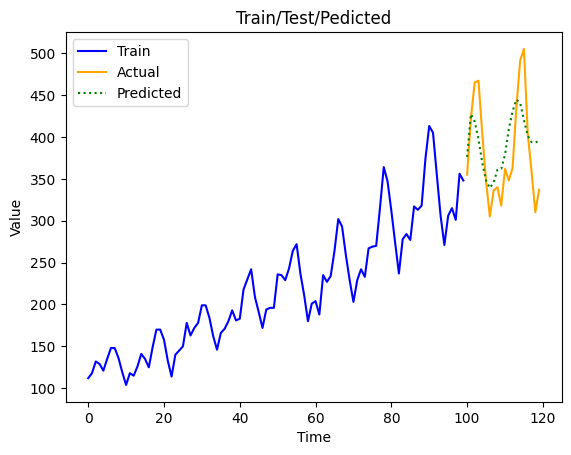

In [9]:
y_hat = reg.iterative_forecast(y=y_train, prediction_horizon=20)

plt.plot(np.arange(0, len(y_train)), y_train, label="Train", color="blue")
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_test)),
    y_test,
    label="Actual",
    color="orange",
)
plt.plot(
    np.arange(len(y_train), len(y_train) + len(y_hat)),
    y_hat,
    label="Predicted",
    color="green",
    linestyle=":",
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Train/Test/Pedicted")
plt.show()

Looking closer, we can see the errors our forecaster is making.

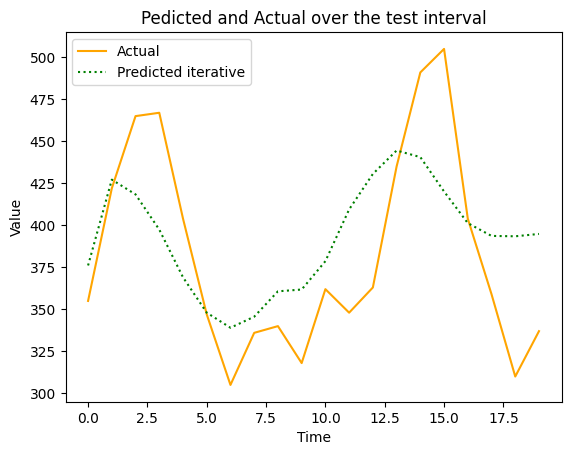

In [11]:
plt.plot(y_test, label="Actual", color="orange")
plt.plot(y_hat, label="Predicted iterative", color="green", linestyle=":")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Pedicted and Actual over the test interval")
plt.show()

contrast this to the direct strategy, it results in very different forecasts 

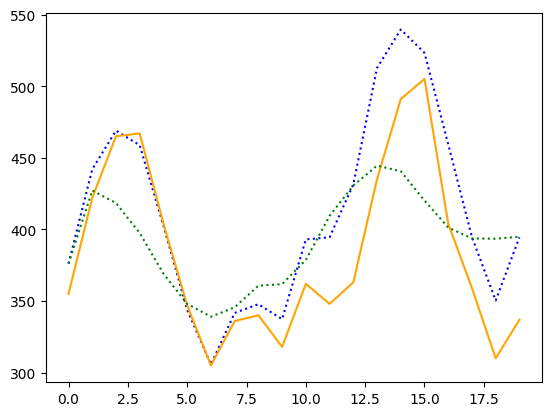

In [15]:
y_hat2 = reg.direct_forecast(y=y_train, prediction_horizon=20)
plt.plot(y_hat2, label="Predicted direct", color="blue", linestyle=":")
plt.plot(y_test, label="Actual", color="orange")
plt.plot(y_hat, label="Predicted iterative", color="green", linestyle=":")
plt.show()